In [1]:
# INX Employee Performance Analysis - Model Prediction
# This notebook uses the trained model to make predictions on new employee data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
MODEL_PATH = r'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Source Code\models\best_model.pkl'  
LABEL_ENCODER_PATH = r'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Source Code\models\label_encoder.pkl' 

X_TEST_PATH = r'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\X_test_selected.csv' 
Y_TEST_PATH = r'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\y_test.csv'

RESULTS_PATH = r'C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\employee_predictions.csv'

### Task3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees 

In [5]:
def load_model_and_encoder():
    """Load the trained model and label encoder"""
    try:
        # Load the trained model
        model = joblib.load(MODEL_PATH)
        print(f"✓ Model loaded successfully from {MODEL_PATH}")
        
        # Load the label encoder
        label_encoder = joblib.load(LABEL_ENCODER_PATH)  
        print(f"✓ Label encoder loaded successfully from {LABEL_ENCODER_PATH}")
        
        return model, label_encoder
        
    except FileNotFoundError as e:
        print(f"❌ Error loading files: {e}")
        print("Please check your file paths in the configuration section above")
        return None, None

In [6]:
# Load model and encoder
model, label_encoder = load_model_and_encoder()

✓ Model loaded successfully from C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Source Code\models\best_model.pkl
✓ Label encoder loaded successfully from C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Source Code\models\label_encoder.pkl


In [7]:
# =============================================================================
# LOAD TEST DATA
# =============================================================================

def load_test_data():
    """Load test data for predictions"""
    try:
        # Load features
        X_test = pd.read_csv(X_TEST_PATH)
        print(f"✓ Test features loaded: {X_test.shape}")
        
        # Load actual labels  
        y_test = pd.read_csv(Y_TEST_PATH)
        if y_test.shape[1] == 1:
            y_test = y_test.iloc[:, 0]  # Convert to series if single column
        print(f"✓ Test labels loaded: {len(y_test)} samples")
        
        return X_test, y_test
        
    except FileNotFoundError as e:
        print(f"❌ Error loading test data: {e}")
        print("Please check your test data paths in the configuration section")
        return None, None

# Load test data
X_test, y_test = load_test_data()

✓ Test features loaded: (240, 20)
✓ Test labels loaded: 240 samples


In [1]:
# =============================================================================
# MAKE PREDICTIONS
# =============================================================================

def make_predictions(model, label_encoder, X_test, y_test):
    """Make predictions and decode them back to original labels"""
    
    if model is None or X_test is None:
        print("❌ Cannot make predictions - model or data not loaded")
        return None, None, None
    
    print("\n" + "="*50)
    print("MAKING PREDICTIONS...")
    print("="*50)
    
    # Make predictions (these will be encoded labels)
    y_pred_encoded = model.predict(X_test)
    print(f"✓ Predictions made for {len(y_pred_encoded)} samples")
    
    # Decode predictions back to original performance ratings
    y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded)
    print("✓ Predictions decoded to original performance ratings")
    
    # Also decode the actual test labels if they're encoded
    try:
        y_test_decoded = label_encoder.inverse_transform(y_test)
        print("✓ Test labels decoded")
    except:
        # If y_test is already decoded, use as is
        y_test_decoded = y_test
        print("✓ Test labels already in original format")
    
    # Get prediction probabilities if available
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        print("✓ Prediction probabilities calculated")
    else:
        y_pred_proba = None
        print("ℹ Model doesn't support probability predictions")
    
    return y_pred_decoded, y_test_decoded, y_pred_proba


In [9]:
#Make Predictions
y_pred, y_actual, y_proba = make_predictions(model, label_encoder, X_test, y_test)



MAKING PREDICTIONS...
✓ Predictions made for 240 samples
✓ Predictions decoded to original performance ratings
✓ Test labels already in original format
✓ Prediction probabilities calculated


In [10]:
# =============================================================================
# ANALYZE PREDICTIONS
# =============================================================================

def analyze_results(y_pred, y_actual, y_proba=None):
    """Analyze and visualize prediction results"""
    
    if y_pred is None:
        return None
    
    print("\n" + "="*50)
    print("PREDICTION RESULTS ANALYSIS")
    print("="*50)
    
    # Create results dataframe
    results_df = pd.DataFrame({
        'Predicted_Rating': y_pred,
        'Actual_Rating': y_actual if y_actual is not None else np.nan
    })
    
    # Add performance categories
    rating_map = {1: 'Poor', 2: 'Below Average', 3: 'Average', 4: 'Good', 5: 'Excellent'}
    results_df['Predicted_Category'] = results_df['Predicted_Rating'].map(rating_map)
    if y_actual is not None:
        results_df['Actual_Category'] = results_df['Actual_Rating'].map(rating_map)
        results_df['Correct_Prediction'] = results_df['Predicted_Rating'] == results_df['Actual_Rating']
    
    # Print summary statistics
    print("\nPREDICTION SUMMARY:")
    print("-" * 30)
    pred_counts = results_df['Predicted_Rating'].value_counts().sort_index()
    for rating, count in pred_counts.items():
        category = rating_map[rating]
        percentage = (count / len(results_df)) * 100
        print(f"Rating {rating} ({category}): {count} employees ({percentage:.1f}%)")
    
    # Calculate accuracy if actual values available
    if y_actual is not None:
        accuracy = accuracy_score(y_actual, y_pred)
        print(f"\nOverall Accuracy: {accuracy:.3f} ({accuracy:.1%})")
    
    return results_df

# Analyze results
results_df = analyze_results(y_pred, y_actual, y_proba)


PREDICTION RESULTS ANALYSIS

PREDICTION SUMMARY:
------------------------------
Rating 2 (Below Average): 38 employees (15.8%)
Rating 3 (Average): 181 employees (75.4%)
Rating 4 (Good): 21 employees (8.8%)

Overall Accuracy: 0.933 (93.3%)



CREATING VISUALIZATIONS...


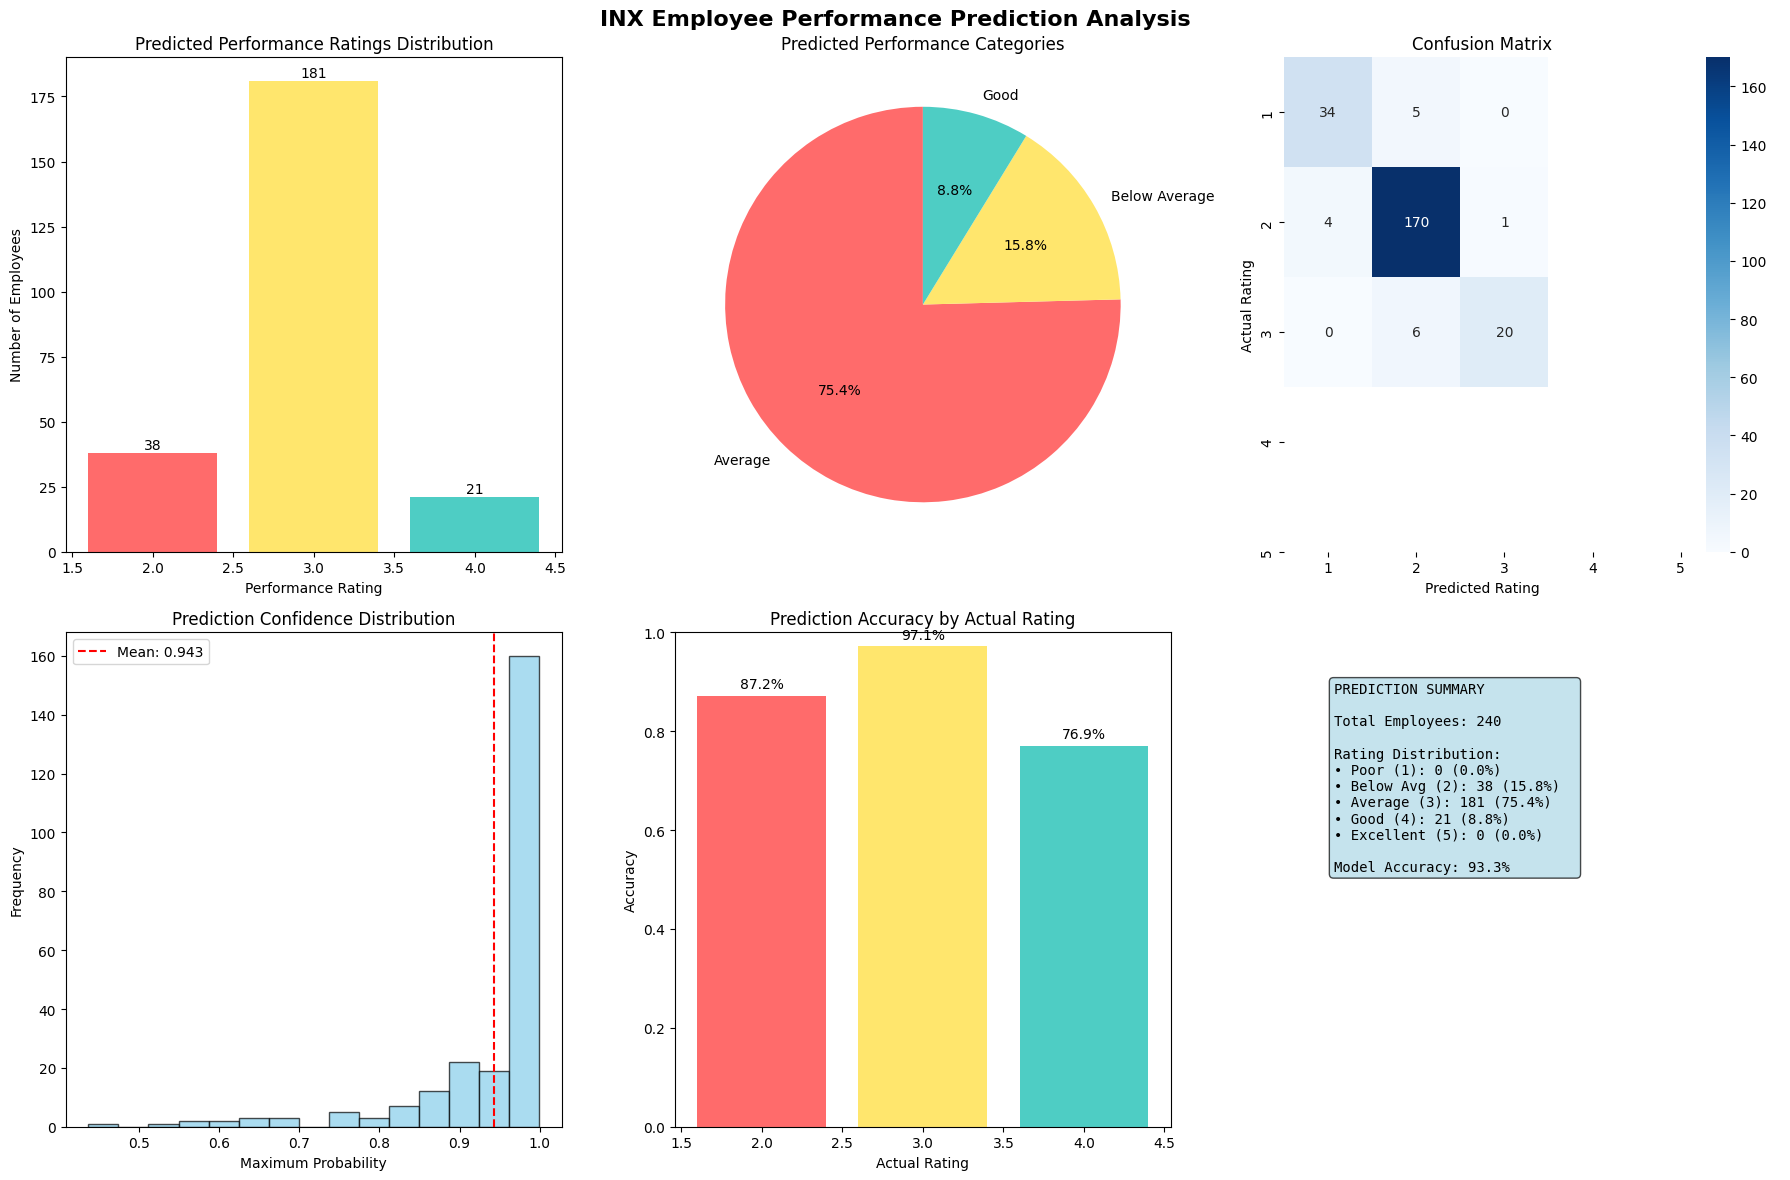

✓ Visualizations created successfully


In [11]:
# =============================================================================
# VISUALIZATIONS
# =============================================================================

def create_visualizations(results_df, y_proba=None):
    """Create visualizations for prediction results"""
    
    if results_df is None:
        return
    
    print("\n" + "="*50)
    print("CREATING VISUALIZATIONS...")
    print("="*50)
    
    # Set up the plot
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('INX Employee Performance Prediction Analysis', fontsize=16, fontweight='bold')
    
    # Colors for consistency
    colors = ['#FF6B6B', '#FFE66D', '#4ECDC4', '#45B7D1', '#96CEB4']
    
    # 1. Predicted Rating Distribution
    ax1 = axes[0, 0]
    pred_counts = results_df['Predicted_Rating'].value_counts().sort_index()
    bars1 = ax1.bar(pred_counts.index, pred_counts.values, color=colors)
    ax1.set_title('Predicted Performance Ratings Distribution')
    ax1.set_xlabel('Performance Rating')
    ax1.set_ylabel('Number of Employees')
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')
    
    # 2. Predicted Categories Pie Chart
    ax2 = axes[0, 1]
    category_counts = results_df['Predicted_Category'].value_counts()
    ax2.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90)
    ax2.set_title('Predicted Performance Categories')
    
    # 3. Confusion Matrix (if actual values available)
    ax3 = axes[0, 2]
    if 'Actual_Rating' in results_df.columns and not results_df['Actual_Rating'].isna().all():
        cm = confusion_matrix(results_df['Actual_Rating'], results_df['Predicted_Rating'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3,
                   xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
        ax3.set_title('Confusion Matrix')
        ax3.set_xlabel('Predicted Rating')
        ax3.set_ylabel('Actual Rating')
    else:
        ax3.text(0.5, 0.5, 'No actual ratings\navailable for\nconfusion matrix', 
                ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Confusion Matrix')
        ax3.set_xticks([])
        ax3.set_yticks([])
    
    # 4. Prediction Confidence (if probabilities available)
    ax4 = axes[1, 0]
    if y_proba is not None:
        max_probs = np.max(y_proba, axis=1)
        ax4.hist(max_probs, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        ax4.axvline(np.mean(max_probs), color='red', linestyle='--', 
                   label=f'Mean: {np.mean(max_probs):.3f}')
        ax4.set_title('Prediction Confidence Distribution')
        ax4.set_xlabel('Maximum Probability')
        ax4.set_ylabel('Frequency')
        ax4.legend()
    else:
        ax4.text(0.5, 0.5, 'No probability\ndata available', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Prediction Confidence Distribution')
        ax4.set_xticks([])
        ax4.set_yticks([])
    
    # 5. Accuracy by Rating (if actual values available)
    ax5 = axes[1, 1]
    if 'Correct_Prediction' in results_df.columns:
        accuracy_by_rating = results_df.groupby('Actual_Rating')['Correct_Prediction'].mean()
        bars5 = ax5.bar(accuracy_by_rating.index, accuracy_by_rating.values, color=colors)
        ax5.set_title('Prediction Accuracy by Actual Rating')
        ax5.set_xlabel('Actual Rating')
        ax5.set_ylabel('Accuracy')
        ax5.set_ylim(0, 1)
        
        # Add percentage labels
        for bar in bars5:
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.1%}', ha='center', va='bottom')
    else:
        ax5.text(0.5, 0.5, 'No actual ratings\navailable for\naccuracy analysis', 
                ha='center', va='center', transform=ax5.transAxes)
        ax5.set_title('Prediction Accuracy by Rating')
        ax5.set_xticks([])
        ax5.set_yticks([])
    
    # 6. Summary Statistics
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    # Create summary text
    total_predictions = len(results_df)
    summary_text = f"""PREDICTION SUMMARY

Total Employees: {total_predictions}

Rating Distribution:
• Poor (1): {(results_df['Predicted_Rating'] == 1).sum()} ({(results_df['Predicted_Rating'] == 1).mean():.1%})
• Below Avg (2): {(results_df['Predicted_Rating'] == 2).sum()} ({(results_df['Predicted_Rating'] == 2).mean():.1%})  
• Average (3): {(results_df['Predicted_Rating'] == 3).sum()} ({(results_df['Predicted_Rating'] == 3).mean():.1%})
• Good (4): {(results_df['Predicted_Rating'] == 4).sum()} ({(results_df['Predicted_Rating'] == 4).mean():.1%})
• Excellent (5): {(results_df['Predicted_Rating'] == 5).sum()} ({(results_df['Predicted_Rating'] == 5).mean():.1%})
"""
    
    if 'Correct_Prediction' in results_df.columns:
        accuracy = results_df['Correct_Prediction'].mean()
        summary_text += f"\nModel Accuracy: {accuracy:.1%}"
    
    ax6.text(0.1, 0.9, summary_text, transform=ax6.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Visualizations created successfully")

# Create visualizations
if results_df is not None:
    create_visualizations(results_df, y_proba)

### Task4. Recommendations to improve the employee performance based on insights from analysis.


In [15]:
# =============================================================================
# TOP/BOTTOM PERFORMERS ANALYSIS
# =============================================================================

def identify_performers(results_df, X_test, top_n=5):
    """Identify top and bottom performers with employee details"""
    
    if results_df is None or X_test is None:
        return
    
    print("\n" + "="*50)
    print("EMPLOYEE PERFORMANCE INSIGHTS")
    print("="*50)
    
    # Add index to results for easier tracking
    results_with_idx = results_df.copy()
    results_with_idx['Employee_ID'] = range(1, len(results_df) + 1)
    
    # Top performers
    top_performers = results_with_idx.nlargest(top_n, 'Predicted_Rating')
    print(f"\n🌟 TOP {top_n} PREDICTED PERFORMERS:")
    print("-" * 40)
    
    for i, (_, row) in enumerate(top_performers.iterrows(), 1):
        emp_id = row['Employee_ID']
        rating = row['Predicted_Rating']
        category = row['Predicted_Category']
        
        print(f"{i}. Employee {emp_id}")
        print(f"   Predicted Rating: {rating} ({category})")
        if 'Actual_Rating' in row and not pd.isna(row['Actual_Rating']):
            print(f"   Actual Rating: {row['Actual_Rating']}")
        print()
    
    # Bottom performers  
    bottom_performers = results_with_idx.nsmallest(top_n, 'Predicted_Rating')
    print(f"⚠️  EMPLOYEES NEEDING ATTENTION (Bottom {top_n}):")
    print("-" * 40)
    
    for i, (_, row) in enumerate(bottom_performers.iterrows(), 1):
        emp_id = row['Employee_ID']
        rating = row['Predicted_Rating']
        category = row['Predicted_Category']
        
        print(f"{i}. Employee {emp_id}")
        print(f"   Predicted Rating: {rating} ({category})")
        if 'Actual_Rating' in row and not pd.isna(row['Actual_Rating']):
            print(f"   Actual Rating: {row['Actual_Rating']}")
        print("   Recommendation: Focus on performance improvement")
        print()

In [16]:
# Identify top/bottom performers
if results_df is not None:
    identify_performers(results_df, X_test)


EMPLOYEE PERFORMANCE INSIGHTS

🌟 TOP 5 PREDICTED PERFORMERS:
----------------------------------------
1. Employee 27
   Predicted Rating: 4 (Good)
   Actual Rating: 4

2. Employee 32
   Predicted Rating: 4 (Good)
   Actual Rating: 4

3. Employee 39
   Predicted Rating: 4 (Good)
   Actual Rating: 4

4. Employee 46
   Predicted Rating: 4 (Good)
   Actual Rating: 4

5. Employee 47
   Predicted Rating: 4 (Good)
   Actual Rating: 4

⚠️  EMPLOYEES NEEDING ATTENTION (Bottom 5):
----------------------------------------
1. Employee 4
   Predicted Rating: 2 (Below Average)
   Actual Rating: 2
   Recommendation: Focus on performance improvement

2. Employee 7
   Predicted Rating: 2 (Below Average)
   Actual Rating: 2
   Recommendation: Focus on performance improvement

3. Employee 12
   Predicted Rating: 2 (Below Average)
   Actual Rating: 2
   Recommendation: Focus on performance improvement

4. Employee 22
   Predicted Rating: 2 (Below Average)
   Actual Rating: 2
   Recommendation: Focus on p

In [17]:
# =============================================================================
# SAVE RESULTS
# =============================================================================

def save_results(results_df, X_test):
    """Save prediction results to CSV"""
    
    if results_df is None or X_test is None:
        return None
    
    print("\n" + "="*50)
    print("SAVING RESULTS...")
    print("="*50)
    
    # Combine features with predictions
    final_results = pd.concat([
        X_test.reset_index(drop=True),
        results_df.reset_index(drop=True)
    ], axis=1)
    
    # Add employee ID for tracking
    final_results.insert(0, 'Employee_ID', range(1, len(final_results) + 1))
    
    try:
        final_results.to_csv(RESULTS_PATH, index=False)
        print(f"✓ Results saved to: {RESULTS_PATH}")
        print(f"✓ Saved {len(final_results)} employee predictions")
        return final_results
        
    except Exception as e:
        print(f"❌ Error saving results: {e}")
        return None

# Save results
final_results = save_results(results_df, X_test)


SAVING RESULTS...
✓ Results saved to: C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\employee_predictions.csv
✓ Saved 240 employee predictions


In [18]:
# =============================================================================
# DETAILED PERFORMANCE REPORT
# =============================================================================

def print_detailed_report(results_df, y_actual, y_pred):
    """Print detailed classification report"""
    
    if results_df is None or y_actual is None:
        return
    
    print("\n" + "="*50)
    print("DETAILED PERFORMANCE REPORT")
    print("="*50)
    
    # Overall metrics
    accuracy = accuracy_score(y_actual, y_pred)
    print(f"Overall Model Accuracy: {accuracy:.4f} ({accuracy:.2%})")
    
    print("\nDetailed Classification Report:")
    print("-" * 50)
    
    # Get unique classes in the data
    unique_classes = sorted(np.unique(np.concatenate([y_actual, y_pred])))
    print(f"Classes found in data: {unique_classes}")
    
    # Create target names only for classes that exist
    rating_map = {1: 'Poor', 2: 'Below Average', 3: 'Average', 4: 'Good', 5: 'Excellent'}
    target_names = [rating_map.get(cls, f'Rating_{cls}') for cls in unique_classes]
    
    print(classification_report(y_actual, y_pred, labels=unique_classes, target_names=target_names))

# Print detailed report
if results_df is not None and y_actual is not None:
    print_detailed_report(results_df, y_actual, y_pred)


DETAILED PERFORMANCE REPORT
Overall Model Accuracy: 0.9333 (93.33%)

Detailed Classification Report:
--------------------------------------------------
Classes found in data: [np.int64(2), np.int64(3), np.int64(4)]
               precision    recall  f1-score   support

Below Average       0.89      0.87      0.88        39
      Average       0.94      0.97      0.96       175
         Good       0.95      0.77      0.85        26

     accuracy                           0.93       240
    macro avg       0.93      0.87      0.90       240
 weighted avg       0.93      0.93      0.93       240



In [19]:
# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("\n" + "="*60)
print("🎉 PREDICTION PROCESS COMPLETED SUCCESSFULLY!")
print("="*60)

if results_df is not None:
    print(f"✅ Processed {len(results_df)} employee records")
    print("✅ Generated performance predictions")
    print("✅ Created detailed visualizations")
    print("✅ Identified top and bottom performers")
    if final_results is not None:
        print(f"✅ Saved results to {RESULTS_PATH}")
    
    if y_actual is not None:
        accuracy = accuracy_score(y_actual, y_pred)
        print(f"✅ Model accuracy: {accuracy:.1%}")

print("\n📋 NEXT STEPS:")
print("- Review the visualizations above")
print("- Check top performers for recognition/promotion")  
print("- Develop improvement plans for low performers")
print("- Use insights to guide HR decisions")
if final_results is not None:
    print(f"- Open {RESULTS_PATH} for detailed employee data")

print("\n" + "="*60)


🎉 PREDICTION PROCESS COMPLETED SUCCESSFULLY!
✅ Processed 240 employee records
✅ Generated performance predictions
✅ Created detailed visualizations
✅ Identified top and bottom performers
✅ Saved results to C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\employee_predictions.csv
✅ Model accuracy: 93.3%

📋 NEXT STEPS:
- Review the visualizations above
- Check top performers for recognition/promotion
- Develop improvement plans for low performers
- Use insights to guide HR decisions
- Open C:\Users\aksha\OneDrive\Documents\Asha\Projects\Employment_Performance_Analysis\Data\processed\employee_predictions.csv for detailed employee data

